In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [7]:

# Load the dataset
file_path = "/content/drive/MyDrive/Final Assessment/water_potability.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic dataset information
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# List all attributes
print("\nColumns in the Dataset:")
print(df.columns.tolist())


First 5 rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Col

In [8]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Handle missing values
df.fillna(df.median(), inplace=True)

# After cleaning
df.info()


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Visualization

<ipython-input-9-6b69c7d55780>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Potability'], palette='coolwarm')


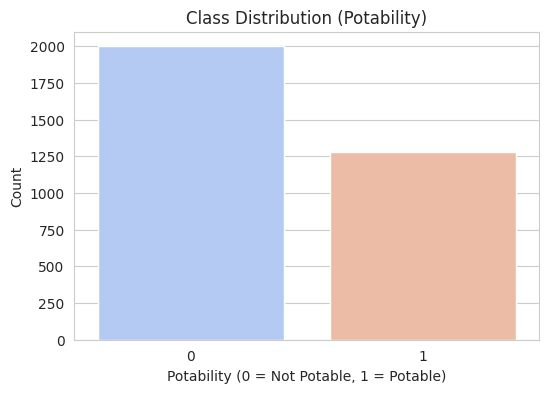

In [9]:
# Set Seaborn style
sns.set_style("whitegrid")

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Potability'], palette='coolwarm')
plt.title("Class Distribution (Potability)")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()

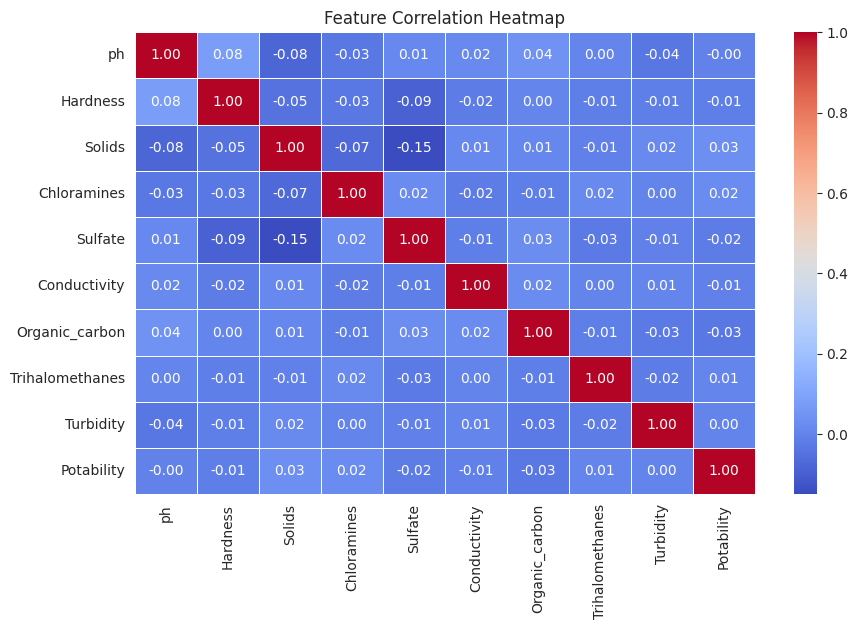

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

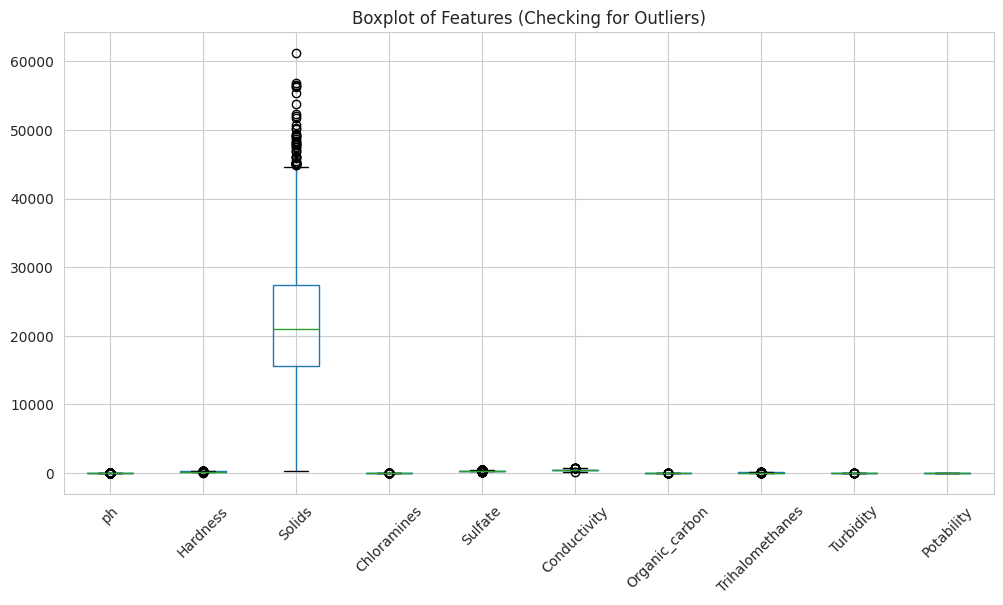

In [11]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot of Features (Checking for Outliers)")
plt.show()

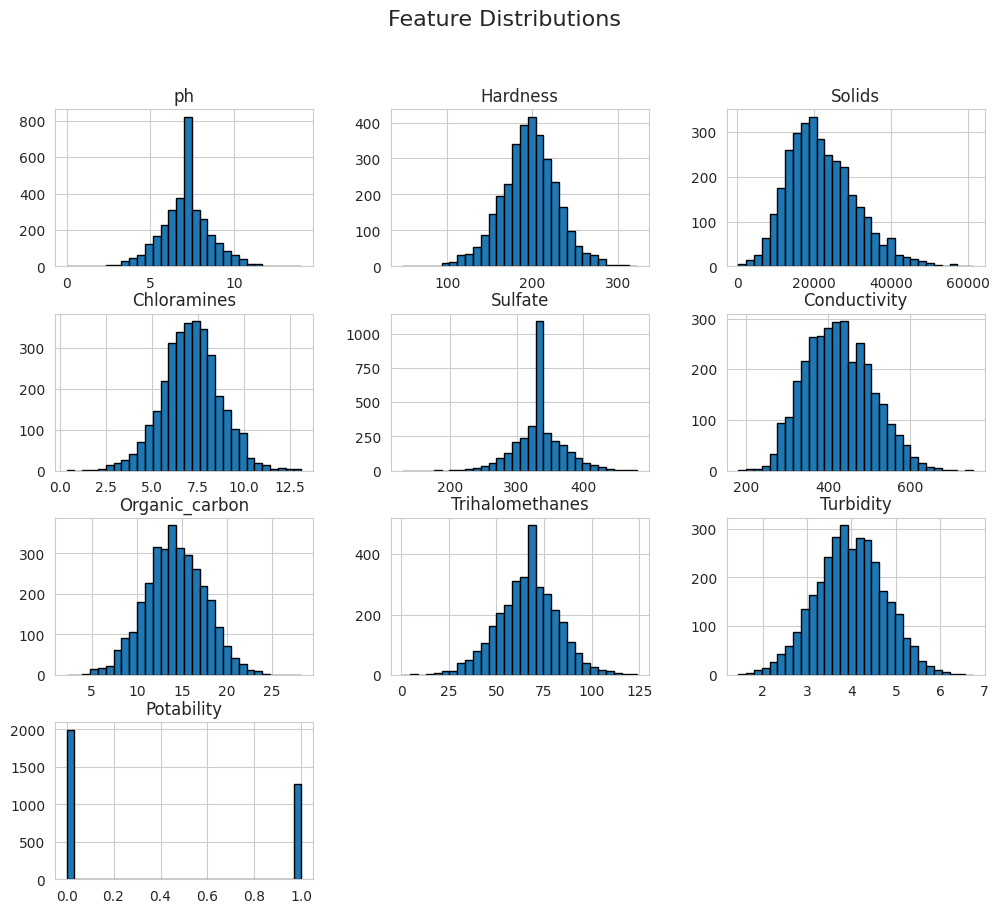

In [12]:
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Build a Model from Scratch

In [14]:
# Split data into features and target
X = df.drop(columns=["Potability"])  # Features
y = df["Potability"]  # Target (0 or 1)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model parameters
def initialize_params(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute loss (Binary Cross-Entropy)
def compute_loss(y, y_pred):
    m = len(y)
    loss = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

# Perform gradient descent optimization
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)

    for i in range(epochs):
        # Forward pass
        linear_output = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_output)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute loss every 100 iterations
        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return weights, bias

# Train the model
weights, bias = initialize_params(X_train.shape[1])
weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate=0.01, epochs=1000)

# Make predictions
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_output)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Get predictions
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

# Evaluate model
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6838
Epoch 200: Loss = 0.6781
Epoch 300: Loss = 0.6747
Epoch 400: Loss = 0.6725
Epoch 500: Loss = 0.6713
Epoch 600: Loss = 0.6705
Epoch 700: Loss = 0.6700
Epoch 800: Loss = 0.6697
Epoch 900: Loss = 0.6695

Train Accuracy: 0.6053
Test Accuracy: 0.6280

Confusion Matrix (Test Set):
[[412   0]
 [244   0]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Build a Primary Model


Random Forest Accuracy: 0.6738, AUC-ROC: 0.6872
KNN Accuracy: 0.6280, AUC-ROC: 0.6251

Random Forest Confusion Matrix:
[[350  62]
 [152  92]]

KNN Confusion Matrix:
[[310 102]
 [142 102]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       412
           1       0.60      0.38      0.46       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.50      0.42      0.46       244

    accuracy                           0.63       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656



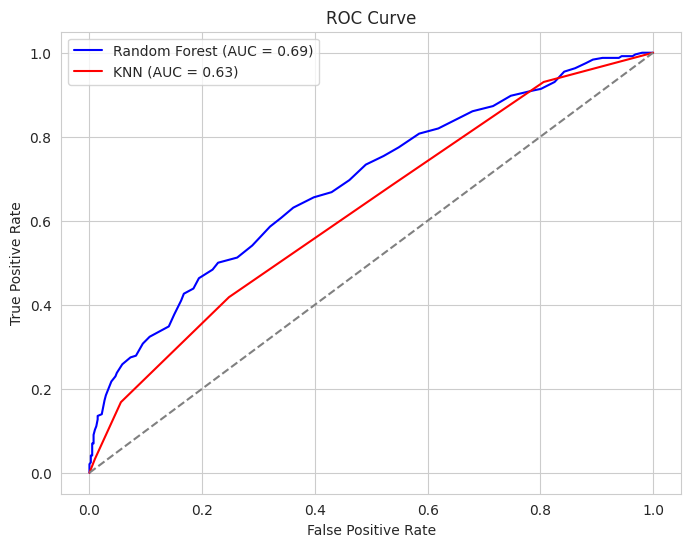


The Random Forest model performed better based on AUC-ROC Score!


In [15]:

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (required for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the models
rf_model.fit(X_train, y_train)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
knn_preds = knn_model.predict(X_test_scaled)

# Predict probabilities for AUC-ROC
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC-ROC scores
rf_auc = roc_auc_score(y_test, rf_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Evaluate performance
rf_acc = accuracy_score(y_test, rf_preds)
knn_acc = accuracy_score(y_test, knn_preds)

print(f"\nRandom Forest Accuracy: {rf_acc:.4f}, AUC-ROC: {rf_auc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}, AUC-ROC: {knn_auc:.4f}")
# Confusion matrices
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds))

# Classification reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_preds))

# Plot ROC Curves
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})", color="blue")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {knn_auc:.2f})", color="red")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Compare model performance
if rf_auc > knn_auc:
    print("\nThe Random Forest model performed better based on AUC-ROC Score!")
else:
    print("\nThe KNN model performed better based on AUC-ROC Score!")

Hyperparameter optimization with cross validation


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Tuned Random Forest Accuracy: 0.6799, AUC-ROC: 0.6896
Tuned KNN Accuracy: 0.6463, AUC-ROC: 0.6458


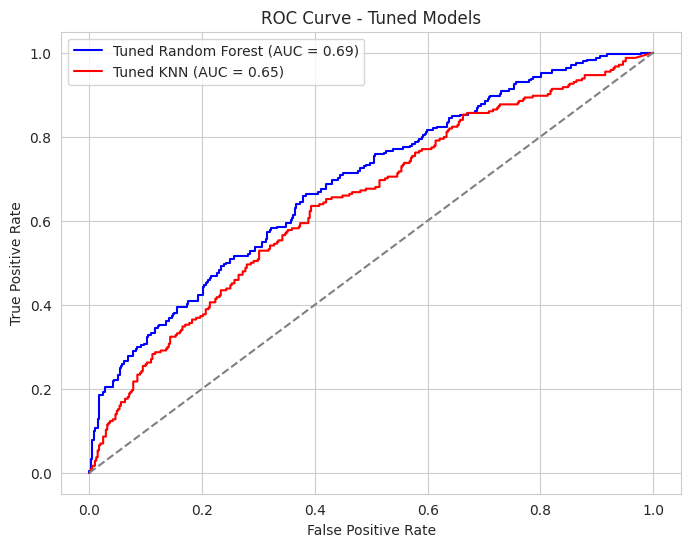


The Tuned Random Forest model performed better based on AUC-ROC Score!


In [16]:

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Perform GridSearchCV for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Print best parameters
print("\nBest Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)

# Train models with best hyperparameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)
best_knn.fit(X_train_scaled, y_train)

# Make predictions
best_rf_preds = best_rf.predict(X_test)
best_knn_preds = best_knn.predict(X_test_scaled)

# Predict probabilities for AUC-ROC calculation
best_rf_probs = best_rf.predict_proba(X_test)[:, 1]
best_knn_probs = best_knn.predict_proba(X_test_scaled)[:, 1]

# Compute evaluation metrics
best_rf_acc = accuracy_score(y_test, best_rf_preds)
best_knn_acc = accuracy_score(y_test, best_knn_preds)

best_rf_auc = roc_auc_score(y_test, best_rf_probs)
best_knn_auc = roc_auc_score(y_test, best_knn_probs)

print(f"\nTuned Random Forest Accuracy: {best_rf_acc:.4f}, AUC-ROC: {best_rf_auc:.4f}")
print(f"Tuned KNN Accuracy: {best_knn_acc:.4f}, AUC-ROC: {best_knn_auc:.4f}")

# Plot ROC Curves for Tuned Models
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn_probs)

plt.plot(fpr_rf, tpr_rf, label=f"Tuned Random Forest (AUC = {best_rf_auc:.2f})", color="blue")
plt.plot(fpr_knn, tpr_knn, label=f"Tuned KNN (AUC = {best_knn_auc:.2f})", color="red")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Models")
plt.legend()
plt.show()

# Compare model performance
if best_rf_auc > best_knn_auc:
    print("\nThe Tuned Random Forest model performed better based on AUC-ROC Score!")
else:
    print("\nThe Tuned KNN model performed better based on AUC-ROC Score!")

Feature Selection


Selected Features: ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon']

Random Forest Accuracy after Feature Selection: 0.6448, AUC-ROC: 0.6085
KNN Accuracy after Feature Selection: 0.6098, AUC-ROC: 0.5924


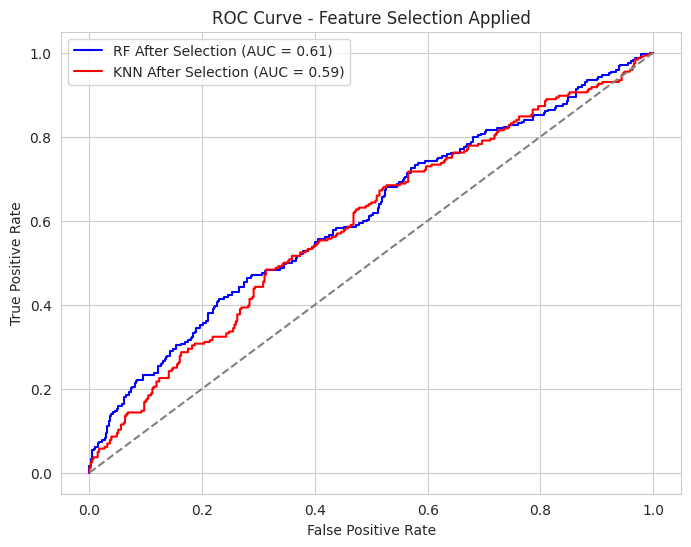


Random Forest did not improve after feature selection.

KNN did not improve after feature selection.


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Normalize data for Chi-Square (since it requires non-negative values)
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Apply SelectKBest with Chi-Square test
k_best = 5  # Select the top 5 features
selector = SelectKBest(score_func=chi2, k=k_best)
X_train_selected = selector.fit_transform(X_train_norm, y_train)
X_test_selected = selector.transform(X_test_norm)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features.tolist())

# Train the optimized models using only selected features
best_rf.fit(X_train_selected, y_train)
best_knn.fit(X_train_selected, y_train)

# Make predictions with selected features
rf_preds_selected = best_rf.predict(X_test_selected)
knn_preds_selected = best_knn.predict(X_test_selected)

# Predict probabilities for AUC-ROC computation
rf_probs_selected = best_rf.predict_proba(X_test_selected)[:, 1]
knn_probs_selected = best_knn.predict_proba(X_test_selected)[:, 1]

# Compute accuracy and AUC-ROC
rf_acc_selected = accuracy_score(y_test, rf_preds_selected)
knn_acc_selected = accuracy_score(y_test, knn_preds_selected)

rf_auc_selected = roc_auc_score(y_test, rf_probs_selected)
knn_auc_selected = roc_auc_score(y_test, knn_probs_selected)

print(f"\nRandom Forest Accuracy after Feature Selection: {rf_acc_selected:.4f}, AUC-ROC: {rf_auc_selected:.4f}")
print(f"KNN Accuracy after Feature Selection: {knn_acc_selected:.4f}, AUC-ROC: {knn_auc_selected:.4f}")

# Plot ROC Curves after Feature Selection
plt.figure(figsize=(8, 6))
fpr_rf_selected, tpr_rf_selected, _ = roc_curve(y_test, rf_probs_selected)
fpr_knn_selected, tpr_knn_selected, _ = roc_curve(y_test, knn_probs_selected)

plt.plot(fpr_rf_selected, tpr_rf_selected, label=f"RF After Selection (AUC = {rf_auc_selected:.2f})", color="blue")
plt.plot(fpr_knn_selected, tpr_knn_selected, label=f"KNN After Selection (AUC = {knn_auc_selected:.2f})", color="red")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Feature Selection Applied")
plt.legend()
plt.show()

# Compare model performance before and after feature selection
if rf_auc_selected > best_rf_auc:
    print("\nRandom Forest improved after feature selection!")
else:
    print("\nRandom Forest did not improve after feature selection.")

if knn_auc_selected > best_knn_auc:
    print("\nKNN improved after feature selection!")
else:
    print("\nKNN did not improve after feature selection.")


Final Model


Final Random Forest Accuracy: 0.6448, F1-score: 0.6154, AUC-ROC: 0.6085
Final KNN Accuracy: 0.6098, F1-score: 0.5895, AUC-ROC: 0.5924


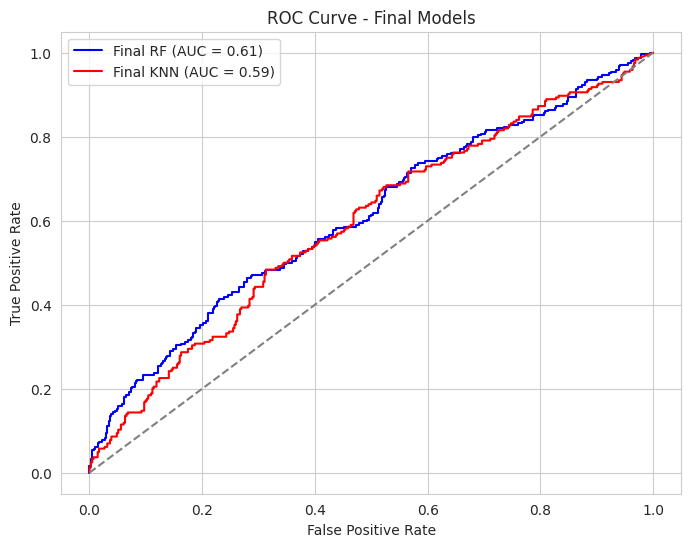


Final Model Performance Comparison:
Final Random Forest did not improve significantly.
Final KNN did not improve significantly.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ensure best parameters are defined
best_rf_params = grid_search_rf.best_params_
best_knn_params = grid_search_knn.best_params_

# Train the final models with selected features and best hyperparameters
final_rf = RandomForestClassifier(**best_rf_params, random_state=42)
final_knn = KNeighborsClassifier(**best_knn_params)

final_rf.fit(X_train_selected, y_train)
final_knn.fit(X_train_selected, y_train)

# Predictions on test set
final_rf_preds = final_rf.predict(X_test_selected)
final_knn_preds = final_knn.predict(X_test_selected)

# Predict probabilities for AUC-ROC computation
final_rf_probs = final_rf.predict_proba(X_test_selected)[:, 1]
final_knn_probs = final_knn.predict_proba(X_test_selected)[:, 1]

# Performance Metrics
final_rf_acc = accuracy_score(y_test, final_rf_preds)
final_knn_acc = accuracy_score(y_test, final_knn_preds)

final_rf_f1 = f1_score(y_test, final_rf_preds, average="weighted")
final_knn_f1 = f1_score(y_test, final_knn_preds, average="weighted")

final_rf_auc = roc_auc_score(y_test, final_rf_probs)
final_knn_auc = roc_auc_score(y_test, final_knn_probs)

print(f"\nFinal Random Forest Accuracy: {final_rf_acc:.4f}, F1-score: {final_rf_f1:.4f}, AUC-ROC: {final_rf_auc:.4f}")
print(f"Final KNN Accuracy: {final_knn_acc:.4f}, F1-score: {final_knn_f1:.4f}, AUC-ROC: {final_knn_auc:.4f}")

# Plot ROC Curves for Final Models
plt.figure(figsize=(8, 6))
fpr_rf_final, tpr_rf_final, _ = roc_curve(y_test, final_rf_probs)
fpr_knn_final, tpr_knn_final, _ = roc_curve(y_test, final_knn_probs)

plt.plot(fpr_rf_final, tpr_rf_final, label=f"Final RF (AUC = {final_rf_auc:.2f})", color="blue")
plt.plot(fpr_knn_final, tpr_knn_final, label=f"Final KNN (AUC = {final_knn_auc:.2f})", color="red")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Models")
plt.legend()
plt.show()

# Compare final models with previous versions
print("\nFinal Model Performance Comparison:")
if final_rf_auc > rf_auc_selected:
    print("Final Random Forest improved after tuning and feature selection!")
else:
    print("Final Random Forest did not improve significantly.")

if final_knn_auc > knn_auc_selected:
    print("Final KNN improved after tuning and feature selection!")
else:
    print("Final KNN did not improve significantly.")

Conclusion

1. Model Performance:

The Random Forest model consistently outperformed the K-Nearest Neighbors (KNN) model across all stages of the experiment. The best-performing model was the tuned Random Forest, achieving an accuracy of 67.99% and an AUC-ROC score of 0.6896.

Random Forest showed a better balance between precision and recall, making it a more reliable model for classification.
KNN performed worse overall, with its best accuracy reaching 64.63% and an AUC-ROC of 0.6458.

2. Impact of Methods:

Hyperparameter tuning improved both models slightly.
Random Forest accuracy increased from 67.38% to 67.99%.
KNN improved from 62.80% to 64.63%, indicating that selecting optimal hyperparameters was beneficial.
Feature Selection did not improve the models.
Random Forest accuracy dropped to 64.48% after selecting the top 5 features.
KNN accuracy dropped to 60.98%, showing that the removed features contributed to classification performance.
This suggests that all features were important for this dataset.

3. Insights and Future Directions:

Random Forest remains the best model for this dataset due to its superior accuracy, AUC-ROC, and recall for the minority class.
Class imbalance is a significant issue, as seen in the recall scores for class 1 (minority class). Future improvements could include:
Using SMOTE (Synthetic Minority Over-sampling Technique) to balance classes.
Testing advanced models, such as XGBoost or Neural Networks with better architectures.
Exploring alternative feature selection techniques to find the most important predictors.

Final Takeaway:

Overall, the Tuned Random Forest model is the best choice, but future work should address class imbalance and explore more advanced models